Adding Libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

**Task 1:**

Generate a large number of random samples from a normal distribution N(0,1)

In [39]:
def generate_samples(size):
    return np.random.normal(5, 1, size)

Compute the sample mean as the sample size increases

In [40]:
def calculate_means(sample_sizes):
    means = []
    for s in sample_sizes:
        sample = generate_samples(s)
        means.append(np.mean(sample))
    return means

Plot the sample mean vs. sample size to illustrate convergence to the true mean

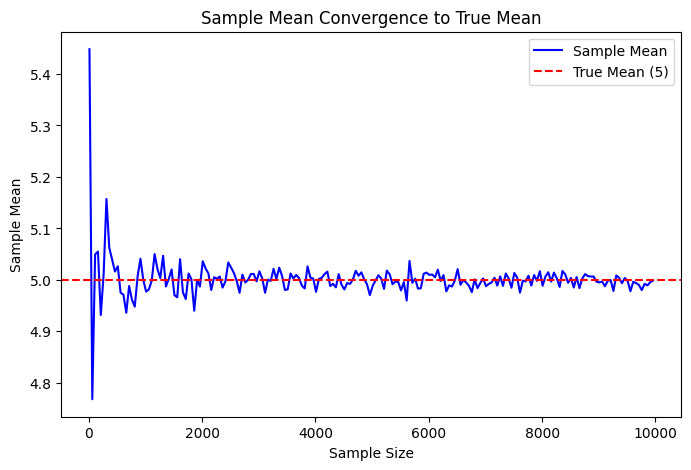

In [41]:
def plot_convergence(sample_sizes, means):
    plt.figure(figsize=(8,5))
    plt.plot(sample_sizes, means, label='Sample Mean', color='blue')
    plt.axhline(y=5, color='r', linestyle='--', label='True Mean (5)')
    plt.xlabel('Sample Size')
    plt.ylabel('Sample Mean')
    plt.title('Sample Mean Convergence to True Mean')
    plt.legend()
    plt.show()

np.random.seed(42)
sizes = np.arange(10, 10001, 50)
means = calculate_means(sizes)
plot_convergence(sizes, means)

**Task 2:**

Generating 1000 samples from exponential:

In [42]:
def generate_exp_samples(size, num_samples=10000):
    return [np.random.exponential(scale=1, size=size) for _ in range(num_samples)]

Compute the mean of each sample and plot the histogram of these means

In [ ]:
def plot_exp_sample_means(size, num_samples=10000):
    samples = generate_exp_samples(size, num_samples)
    means = [np.mean(s) for s in samples]
    plt.hist(means, bins=50, density=True, color='g')
    plt.title(f'Sample Mean Histogram (n={size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.show()

Show that as n increases, the sample means form a normal distribution

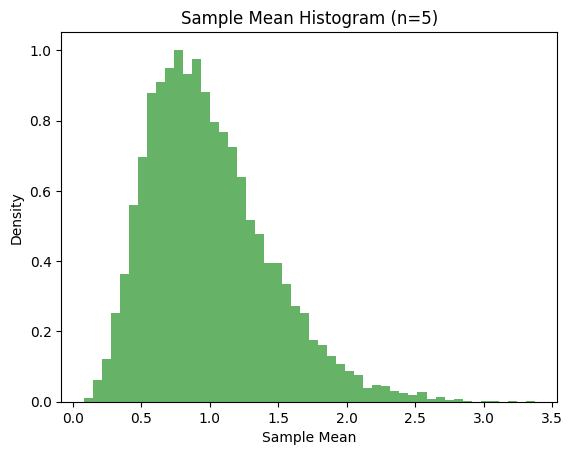

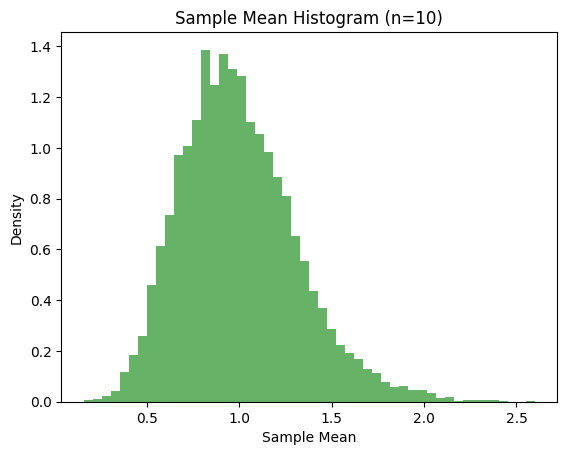

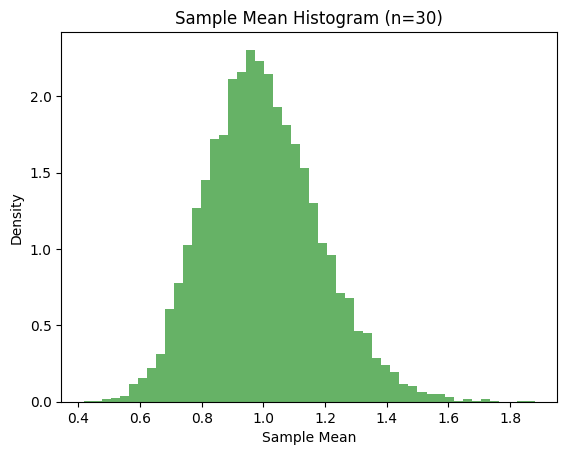

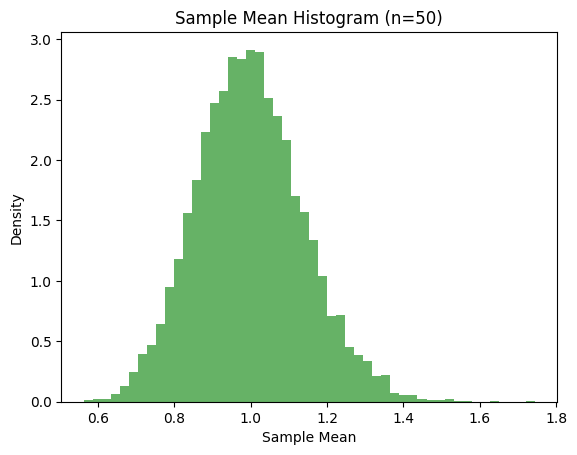

In [44]:
for n in [5, 10, 30, 50]:
    plot_exp_sample_means(n)

**Task 3:**

Generate 10,000 samples of small size n from a normal distribution

In [45]:
def get_small_samples(size, num_samples=10000):
    return [np.random.normal(5, 1, size) for _ in range(num_samples)]

Compute sample variance using both biased and unbiased estimators

In [ ]:
def estimate_variances(size, num_samples=10000):
    samples = get_small_samples(size, num_samples)
    biased_vars = [np.var(s, ddof=0) for s in samples]  # Biased (divided by N)
    unbiased_vars = [stats.tvar(s) for s in samples]  # Unbiased (divided by N-1)
    return biased_vars, unbiased_vars

Compare the average of sample variances to the true variance

Analyzing variances for n=5...
  Mean biased variance: 0.8066
  Mean unbiased variance: 1.0083
  Expected variance: 1

Analyzing variances for n=10...
  Mean biased variance: 0.9014
  Mean unbiased variance: 1.0016
  Expected variance: 1

Analyzing variances for n=20...
  Mean biased variance: 0.9505
  Mean unbiased variance: 1.0005
  Expected variance: 1

Analyzing variances for n=50...
  Mean biased variance: 0.9811
  Mean unbiased variance: 1.0011
  Expected variance: 1



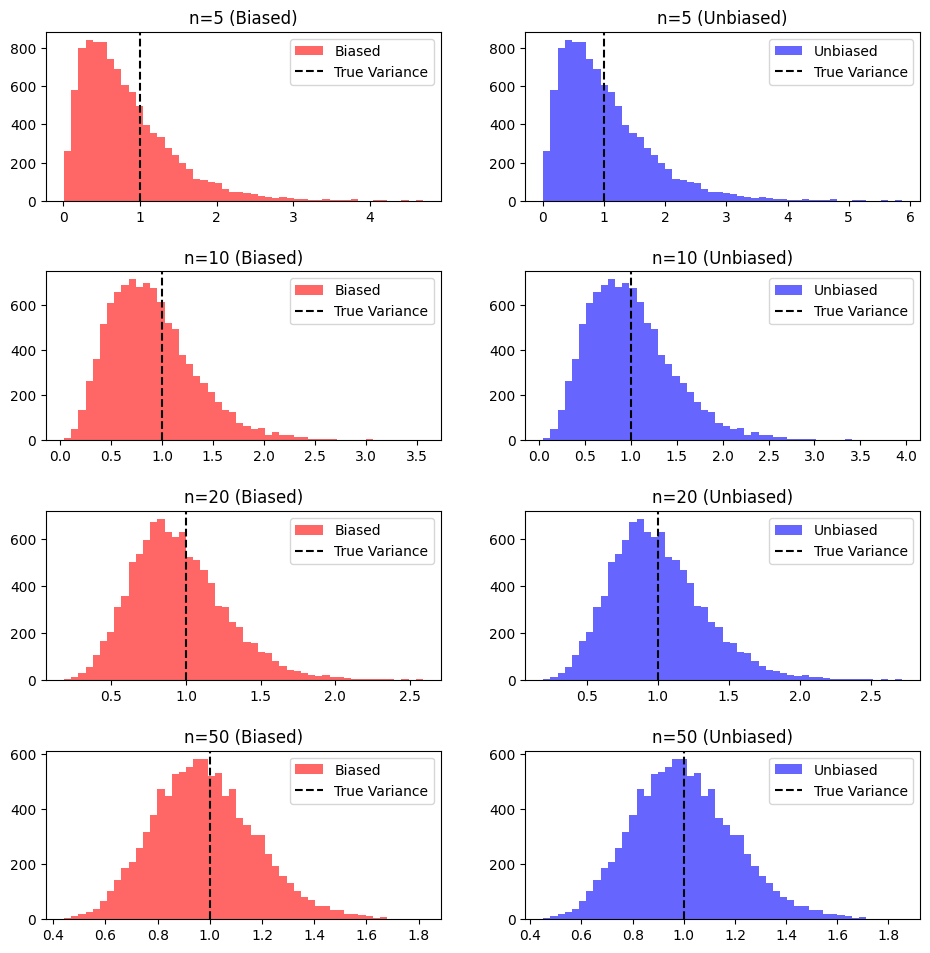

In [ ]:
true_var = 1
sizes = [5, 10, 20, 50]
fig, axes = plt.subplots(len(sizes), 2, figsize=(10, 10))
fig.tight_layout(pad=3.0)

for i, n in enumerate(sizes):
    biased_vars, unbiased_vars = estimate_variances(n)

    axes[i, 0].hist(biased_vars, bins=50, color='red', label='Biased')
    axes[i, 0].axvline(x=true_var, color='black', linestyle='--', label='True Variance')
    axes[i, 0].set_title(f'n={n} (Biased)')
    axes[i, 0].legend()

    axes[i, 1].hist(unbiased_vars, bins=50, color='blue', label='Unbiased')
    axes[i, 1].axvline(x=true_var, color='black', linestyle='--', label='True Variance')
    axes[i, 1].set_title(f'n={n} (Unbiased)')
    axes[i, 1].legend()

plt.show()
